In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("Advertising.csv")

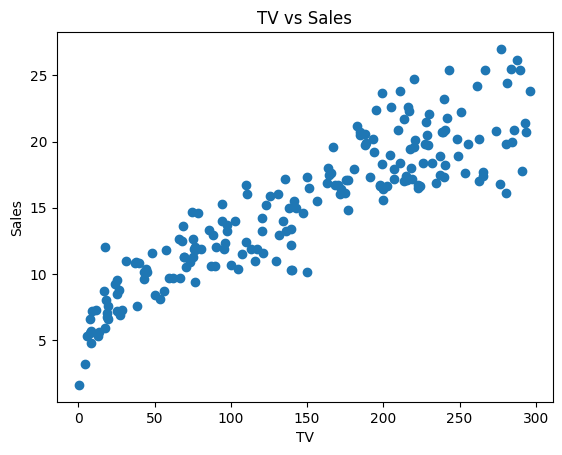

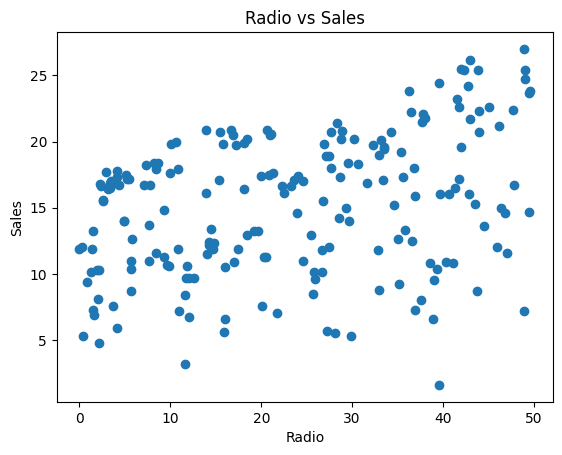

In [5]:
# Plot 1: TV vs Sales
plt.figure()
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

# Plot 2: Radio vs Sales
plt.figure()
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()

In [6]:
X = df[["TV", "Radio", "Newspaper"]].values
y = df["Sales"].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [7]:
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train - X_mean) / X_std
X_val_norm = (X_val - X_mean) / X_std

# Add bias term
X_train_b = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
X_val_b = np.c_[np.ones((X_val_norm.shape[0], 1)), X_val_norm]

# 7. BATCH GRADIENT DESCENT (FROM SCRATCH)
def batch_gradient_descent(X, y, lr=0.01, epochs=2000):
    m, n = X.shape
    theta = np.zeros(n)

    for _ in range(epochs):
        y_pred = X.dot(theta)
        gradients = (2/m) * X.T.dot(y_pred - y)
        theta -= lr * gradients

    return theta

In [8]:
theta_gd = batch_gradient_descent(X_train_b, y_train)

# Predictions (GD)
y_pred_gd = X_val_b.dot(theta_gd)

mae_gd = mean_absolute_error(y_val, y_pred_gd)

print("\nBatch GD Coefficients:")
print("Intercept:", theta_gd[0])
print("TV:", theta_gd[1])
print("Radio:", theta_gd[2])
print("Newspaper:", theta_gd[3])
print("MAE (Batch GD):", mae_gd)

# =====================================
# 8. SKLEARN LINEAR REGRESSION
# =====================================
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)
mae_lr = mean_absolute_error(y_val, y_pred_lr)

print("\nSklearn Linear Regression Coefficients:")
print("Intercept:", lr_model.intercept_)
print("TV:", lr_model.coef_[0])
print("Radio:", lr_model.coef_[1])
print("Newspaper:", lr_model.coef_[2])
print("MAE (Sklearn):", mae_lr)


Batch GD Coefficients:
Intercept: 15.330624999999957
TV: 4.587207741265304
Radio: 1.4898402490232985
Newspaper: 0.08791596686113318
MAE (Batch GD): 1.274826210957356

Sklearn Linear Regression Coefficients:
Intercept: 4.714126402214131
TV: 0.05450927083721978
Radio: 0.10094536239295582
Newspaper: 0.004336646822034024
MAE (Sklearn): 1.2748262109549349
